## Wine Quality Prediction

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Data Cleaning

In [6]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
# We don't need ID column
df.drop('Id', axis=1, inplace=True)

### Data Exploration

In [9]:
# Descriptive Statistics of Dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

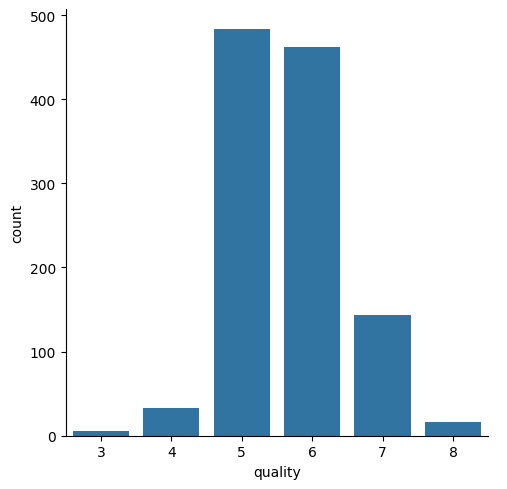

In [11]:
sns.catplot(x=df['quality'], data= df, kind='count')

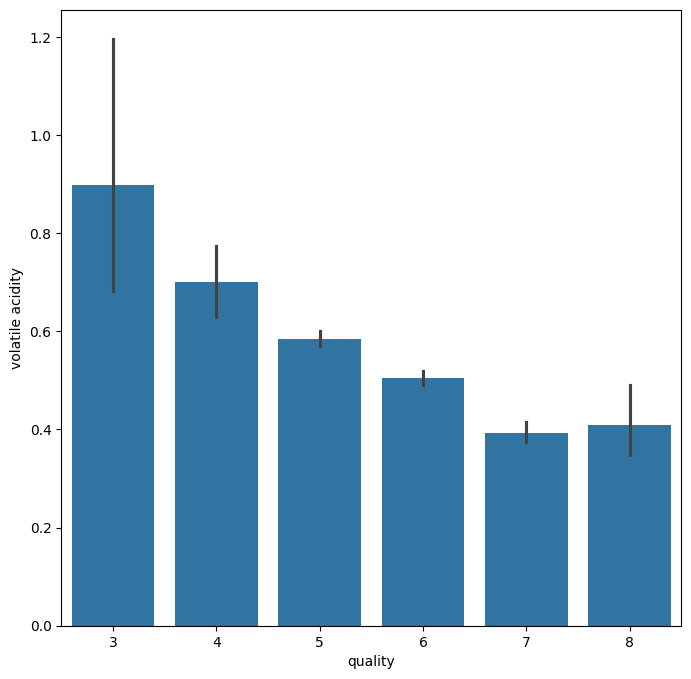

In [14]:
# Impact of Volatile Acidity on Wine Quality.
plt.figure(figsize=(8,8))
sns.barplot(x='quality', y= 'volatile acidity', data=df)
plt.show()

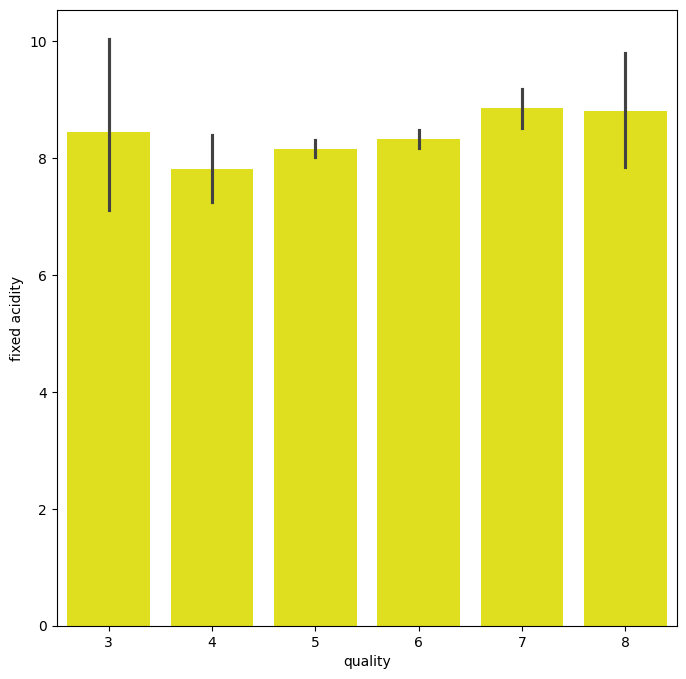

In [15]:
# Impact of Fixed Acidity on Wine Quality.
plt.figure(figsize=(8,8))
sns.barplot(x='quality', y= 'fixed acidity', data=df, color='yellow')
plt.show()

Fixed acidity refers to the non-volatile acids in a substance, like tartaric, malic, and citric acids, which remain in a liquid when boiled, while volatile acidity refers to the short-chain organic acids, primarily acetic acid, that readily evaporate when heated and are considered "volatile" due to their ability to easily vaporize.

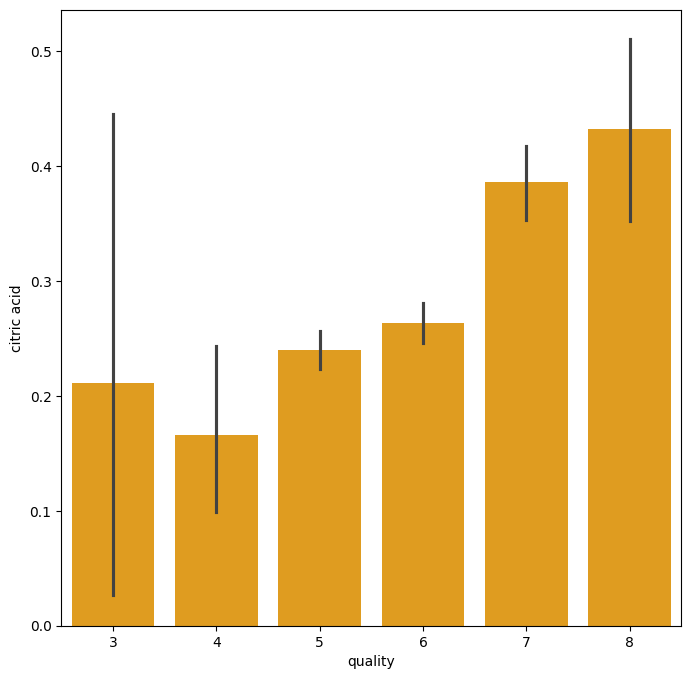

In [16]:
# Impact of Critic Acid on Wine Quality.
plt.figure(figsize=(8,8))
sns.barplot(x='quality', y= 'citric acid', data=df, color='orange')
plt.show()

Citric acid is a weak organic acid that's used in winemaking to increase acidity, improve flavor, and prevent ferric hazes. It's also used as a stabilizer. 

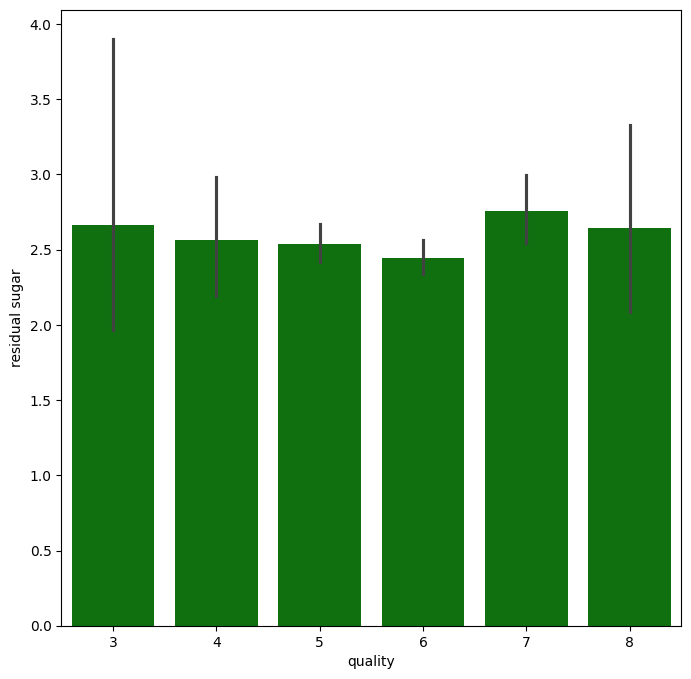

In [17]:
# Impact of Residual Sugar on Wine Quality.
plt.figure(figsize=(8,8))
sns.barplot(x='quality', y= 'residual sugar', data=df, color='green')
plt.show()

Residual Sugar refers to the amount of sugar left in a wine when the alcoholic fermentation has been completed and any additions made prior to bottling the wine. 

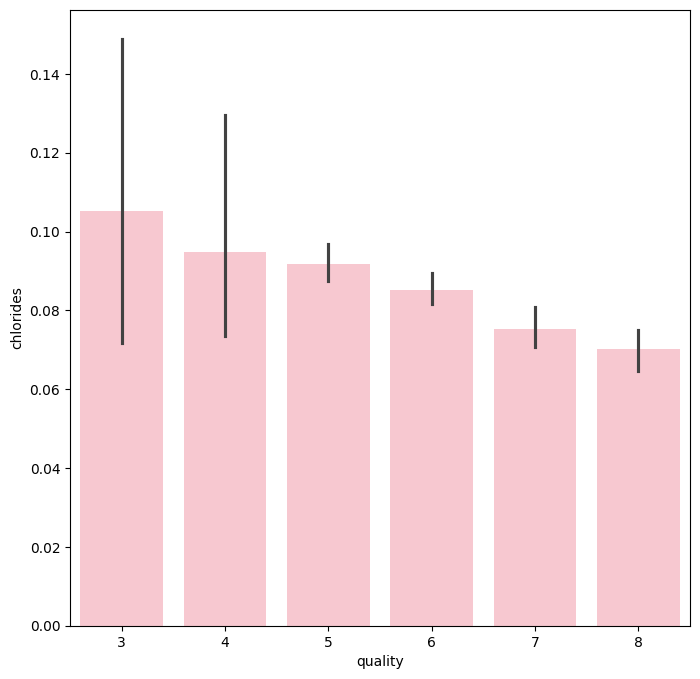

In [19]:
# Impact of Chlorides on Wine Quality.
plt.figure(figsize=(8,8))
sns.barplot(x='quality', y= 'chlorides', data=df, color='pink')
plt.show()

Chloride is usually an indicator of the presence of sodium chloride. 
Sodium chloride contributes to the saltiness of wine. 
High levels of chloride can make wine taste salty.

Let's see the Relationship between all features in one chart using Correlation.

In [20]:
correlation = df.corr()

<Axes: >

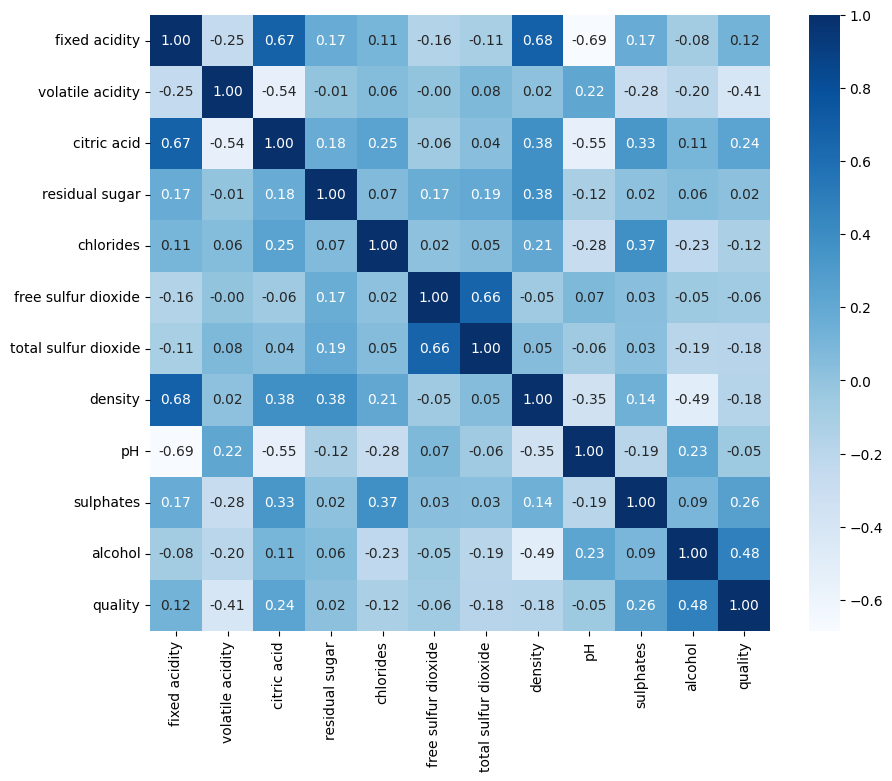

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cbar=True, fmt='.2f', annot=True, cmap='Blues')

The features that have a 'Negative' correlation with the quality feature, mean if we decrease the number of those components the quality of wine increases, and those that have a 'Positive' correlation with quality, mean if we decrease the amount of those components the quality of wine decreases.

### Getting Model Ready

In [24]:
x = df.drop('quality', axis=1)

y= df['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2, random_state=2)

train_test_split() is a function from scikit-learn that we use to split datasets into training and test subsets, which helps us perform unbiased model evaluation and validation. x_train and y_train are the parts of our dataset that we use to train or fit in our machine learning model.

In [26]:
print(y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


In [27]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

### Model Evaluation

In [28]:
x_prediction = model.predict(x_test)
x_prediction

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0])

In [29]:
model_accuracy = accuracy_score(x_prediction, y_test)
print('Accuracy Score =', model_accuracy)

Accuracy Score = 0.759825327510917


The Predicting Accuracy of Model is round about 76% which is a good ratio.

### Let's Check Model with Unseen Data

In [34]:
print('For predicting the quality of your Wine, please provide the following details')

fixed_acidity = float(input('Entre the Amount of Fixed Acidity : '))
volatile_acidity = float(input('Entre the Amount of Volatile Acidity : '))
citric_acid = float(input('Entre the Amount of Citric Acid : '))
residual_sugar = float(input('Entre the Amount of Residual Sugar : ')) 
chlorides = float(input('Entre the Amount of Chlorides : ')) # Chloride in wine is a measure of the number of chloride ions in the wine
free_sulfur = float(input('Entre the Amount of Free Sulphur Dioxide : ')) # Free sulfur in wine is the amount of sulfur dioxide (SO2) that is available to protect the wine from oxidation and microbial spoilage. 
total_sulfur = float(input('Entre the Amount of Total Sulphur Dioxide : ')) # the sum of all of the different forms of sulfur dioxide present in the wine in free form or bound to the wine's constituents.
density = float(input('Entre the Amount of Density : ')) # The density of the wine is the mass of a specific volume of wine at a given temperature.
ph = float(input('Entre the Amount of pH : ')) # Potential of hydrogen (pH) is one of the two main scales used to measure the acidity in wine and countless other solutions.
sulphates = float(input('Entre the Amount of Sulphates : ')) # Sulphites in wine are used to stop fermentation at a specific point in the winemaking process.
alcohol = float(input('Entre the Amount of Alcohol : '))

data = (fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur, total_sulfur, density, ph, sulphates, alcohol)

input_data = np.asarray(data)

input_data  = input_data.reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

if prediction == 1:
    print('Good Quality')
else:
    print('Bad Quality')

For predicting the quality of your Wine, please provide the following details


Entre the Amount of Fixed Acidity :  0
Entre the Amount of Volatile Acidity :  0
Entre the Amount of Citric Acid :  0
Entre the Amount of Residual Sugar :  0
Entre the Amount of Chlorides :  0
Entre the Amount of Free Sulphur Dioxide :  0
Entre the Amount of Total Sulphur Dioxide :  0
Entre the Amount of Density :  0
Entre the Amount of pH :  0
Entre the Amount of Sulphates :  0
Entre the Amount of Alcohol :  0


[0]
Bad Quality
